<a href="https://colab.research.google.com/github/muskanniraula/Crop-Recommendation-System/blob/main/AI_MuskanNiraula_CropRecommendationSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Crop Recommendation using Soil Properties and Weather Prediction (2).csv')

In [ ]:
df.head()

,Soilcolor,Ph,K,P,N,Zn,S,QV2M-W,QV2M-Sp,QV2M-Su,...,PRECTOTCORR-W,PRECTOTCORR-Sp,PRECTOTCORR-Su,PRECTOTCORR-Au,WD10M,GWETTOP,CLOUD_AMT,WS2M_RANGE,PS,label
0,Yellowish brown,5.81,738.231,5.401,0.23,2.976000,13.816,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
1,Yellowish brown,5.43,606.382,10.478,0.23,3.077000,16.421,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
2,brown,5.41,386.580,6.847,0.23,6.611000,16.557,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
3,red,5.65,207.086,3.418,0.23,0.460181,16.075,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
4,red,5.27,317.357,39.282,0.23,2.743000,12.558,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley


In [ ]:
df.shape

(3867, 29)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3867 entries, 0 to 3866
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Soilcolor       3867 non-null   object 
 1   Ph              3867 non-null   float64
 2   K               3867 non-null   float64
 3   P               3867 non-null   float64
 4   N               3867 non-null   float64
 5   Zn              3867 non-null   float64
 6   S               3867 non-null   float64
 7   QV2M-W          3867 non-null   float64
 8   QV2M-Sp         3867 non-null   float64
 9   QV2M-Su         3867 non-null   float64
 10  QV2M-Au         3867 non-null   float64
 11  T2M_MAX-W       3867 non-null   float64
 12  T2M_MAX-Sp      3867 non-null   float64
 13  T2M_MAX-Su      3867 non-null   float64
 14  T2M_MAX-Au      3867 non-null   float64
 15  T2M_MIN-W       3867 non-null   float64
 16  T2M_MIN-Sp      3867 non-null   float64
 17  T2M_MIN-Su      3867 non-null   f

In [ ]:
#missing values
df.isna().sum()

,0
Soilcolor,0
Ph,0
K,0
P,0
N,0
Zn,0
S,0
QV2M-W,0
QV2M-Sp,0
QV2M-Su,0


In [ ]:
#checking categorical value of label
df["label"].value_counts()

,count
label,
Teff,1260
Maize,732
Wheat,715
Barley,503
Bean,253
Pea,94
Sorghum,72
Dagussa,71
Niger seed,64


In [ ]:
#checking categorical value of Soil Color
df["Soilcolor"].value_counts()

,count
Soilcolor,
brown,1297
red,1195
black,860
other,128
gray,88
reddish brown,85
dark brown,51
dark gray,35
Reddish brown,14


In [ ]:
#coverting to correct format
df["Soilcolor"] = df["Soilcolor"].replace('Red', 'red')
df["Soilcolor"] = df["Soilcolor"].replace('Brown', 'brown')
df["Soilcolor"] = df["Soilcolor"].replace('Black', 'black')
df["Soilcolor"] = df["Soilcolor"].replace('redish brown', 'reddish brown')
df["Soilcolor"] = df["Soilcolor"].replace('reddis brown', 'reddish brown')
df["Soilcolor"] = df["Soilcolor"].replace('reddish brown;moist', 'reddish brown')
df["Soilcolor"] = df["Soilcolor"].replace('reddish broown', 'reddish brown')
df["Soilcolor"] = df["Soilcolor"].replace('redishbrown', 'reddish brown')
df["Soilcolor"] = df["Soilcolor"].replace('darkbrown', 'dark brown')
df["Soilcolor"] = df["Soilcolor"].replace('replacement of inaccessible target red;luvisols', 'red;luvisols')
df["Soilcolor"] = df["Soilcolor"].replace('dark greyish brown', 'dark grayish brown')

In [ ]:
#converting to lower case
df['Soilcolor'] = df['Soilcolor'].str.lower()

In [ ]:
#checking categorical value of Soil Color
df["Soilcolor"].value_counts()

,count
Soilcolor,
brown,1302
red,1206
black,867
other,128
reddish brown,100
gray,88
dark brown,70
dark gray,37
dark reddish brown,13


In [ ]:
#Create a dictionary to correct spelling mistakes
spelling_corrections = {
    'lihgtish brown': 'lightish brown',
    'perl brown': 'pearl brown',
    'dark greyish brown': 'dark grayish brown',
    'grayish brown (gb)': 'grayish brown',
    'reddish' : 'red',
    'dark grayish':'dark gray',
    'black;vertisol':'black'

}

#Replace misspelled entries
df["Soilcolor"] = df["Soilcolor"].replace(spelling_corrections)

In [ ]:
#Create a mapping dictionary for replacements
color_mapping = {
    'Red': 'red',
    'reddish': 'reddish',
    'reddish brown': 'reddish brown',
    'dark reddish brown': 'dark reddish brown',
    'very dark brown': 'very dark brown',
    'dark brown': 'dark brown',
    'yellowish brown': 'yellowish brown',
    'grayish brown': 'grayish brown',
    'dark grayish brown': 'dark grayish brown',
    'dark greyish brown': 'dark grayish brown',
    'gray': 'gray',
    'dark gray': 'dark gray',
    'very dark gray': 'very dark gray',
    'reddish gray': 'reddish gray',
    'light red': 'light red',
    'red brown': 'reddish brown',
    'lihgtish brown': 'lightish brown',
    'perl brown': 'pearl brown',
    'replacement of inaccessible target red;luvisols': 'red',
    'red;luvisols': 'red',
    'black;vertisol': 'black',
}

#Replace values in the Soilcolor column
df["Soilcolor"] = df["Soilcolor"].replace(color_mapping)

In [ ]:
#checking categorical value of Soil Color
df["Soilcolor"].value_counts()

,count
Soilcolor,
brown,1302
red,1210
black,868
other,128
reddish brown,101
gray,88
dark brown,70
dark gray,38
dark reddish brown,13


In [ ]:
#adding to another csv
df.to_csv('cleaned_data.csv')

In [ ]:
#read new csv
data = pd.read_csv('/content/cleaned_data.csv')

In [ ]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [ ]:
data.head()

,Unnamed: 0,Soilcolor,Ph,K,P,N,Zn,S,QV2M-W,QV2M-Sp,QV2M-Su,QV2M-Au,T2M_MAX-W,T2M_MAX-Sp,T2M_MAX-Su,T2M_MAX-Au,T2M_MIN-W,T2M_MIN-Sp,T2M_MIN-Su,T2M_MIN-Au,PRECTOTCORR-W,PRECTOTCORR-Sp,PRECTOTCORR-Su,PRECTOTCORR-Au,WD10M,GWETTOP,CLOUD_AMT,WS2M_RANGE,PS,label
0,0,yellowish brown,5.81,738.231,5.401,0.23,2.976000,13.816,7.993333,10.456667,11.963333,9.683333,26.853333,28.526667,23.06,22.273333,5.39,9.89,10.416667,5.693333,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
1,1,yellowish brown,5.43,606.382,10.478,0.23,3.077000,16.421,7.993333,10.456667,11.963333,9.683333,26.853333,28.526667,23.06,22.273333,5.39,9.89,10.416667,5.693333,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
2,2,brown,5.41,386.580,6.847,0.23,6.611000,16.557,7.993333,10.456667,11.963333,9.683333,26.853333,28.526667,23.06,22.273333,5.39,9.89,10.416667,5.693333,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
3,3,red,5.65,207.086,3.418,0.23,0.460181,16.075,7.993333,10.456667,11.963333,9.683333,26.853333,28.526667,23.06,22.273333,5.39,9.89,10.416667,5.693333,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
4,4,red,5.27,317.357,39.282,0.23,2.743000,12.558,7.993333,10.456667,11.963333,9.683333,26.853333,28.526667,23.06,22.273333,5.39,9.89,10.416667,5.693333,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley


In [ ]:
data.describe()

,Unnamed: 0,Ph,K,P,N,Zn,S,QV2M-W,QV2M-Sp,QV2M-Su,QV2M-Au,T2M_MAX-W,T2M_MAX-Sp,T2M_MAX-Su,T2M_MAX-Au,T2M_MIN-W,T2M_MIN-Sp,T2M_MIN-Su,T2M_MIN-Au,PRECTOTCORR-W,PRECTOTCORR-Sp,PRECTOTCORR-Su,PRECTOTCORR-Au,WD10M,GWETTOP,CLOUD_AMT,WS2M_RANGE,PS
count,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000
mean,1933.000000,5.857295,324.284770,11.349588,0.179153,1.774094,11.311625,8.346870,9.082508,12.232020,10.990747,25.557973,29.803876,24.686049,23.282298,6.658860,10.346157,11.582037,8.934315,1.555862,4.023404,14.517500,4.762687,71.579444,0.709028,51.630709,8.262413,78.426168
std,1116.451074,0.676690,202.250133,34.141864,0.066476,1.460809,5.542094,0.613948,0.790654,0.894970,0.993861,4.250256,2.317511,1.585957,1.609512,1.933357,2.304823,1.459263,2.046221,0.691682,1.117531,4.111199,1.394398,80.929898,0.055355,16.328656,9.661188,2.380380
min,0.000000,4.300000,41.134000,0.000000,0.000262,0.100000,0.050000,7.183333,7.650000,10.476667,9.070000,9.030000,25.146667,23.060000,20.616667,2.053333,4.816667,8.433333,3.980000,0.000000,1.940000,4.836667,2.156667,0.060000,0.520000,0.460000,4.860000,74.170000
25%,966.500000,5.390000,191.000000,2.000000,0.131200,1.100000,7.305000,7.933333,8.403333,11.430000,10.150000,25.206667,28.870000,23.533333,22.280000,5.760000,9.296667,10.933333,8.260000,0.910000,3.246667,11.866667,3.463333,36.060000,0.690000,48.620000,5.410000,77.150000
50%,1933.000000,5.780000,282.000000,4.000000,0.179884,1.500000,10.700000,8.383333,9.340000,12.166667,10.926667,25.343333,29.713333,23.650000,22.800000,6.253333,9.810000,11.206667,8.380000,1.736667,4.410000,16.620000,5.430000,68.940000,0.730000,59.110000,6.010000,78.250000
75%,2899.500000,6.200000,405.000000,7.920000,0.230000,2.060000,14.195500,8.910000,9.480000,12.836667,11.433333,28.113333,31.156667,25.643333,24.430000,8.533333,12.253333,12.976667,10.700000,2.073333,5.203333,17.816667,5.823333,88.310000,0.740000,59.110000,6.240000,79.610000
max,3866.000000,8.500000,2119.000000,782.000000,0.695600,45.500000,118.347000,9.723333,10.703333,13.853333,12.800000,30.826667,33.973333,28.243333,26.520000,11.390000,15.656667,14.726667,13.643333,2.780000,5.660000,19.920000,7.420000,354.880000,0.800000,59.110000,46.100000,83.760000


In [ ]:
# Renaming columns
data = data.rename(columns={"Unnamed: 0": "Index"})

In [ ]:
data.head()

,Index,Soilcolor,Ph,K,P,N,Zn,S,QV2M-W,QV2M-Sp,QV2M-Su,QV2M-Au,T2M_MAX-W,T2M_MAX-Sp,T2M_MAX-Su,T2M_MAX-Au,T2M_MIN-W,T2M_MIN-Sp,T2M_MIN-Su,T2M_MIN-Au,PRECTOTCORR-W,PRECTOTCORR-Sp,PRECTOTCORR-Su,PRECTOTCORR-Au,WD10M,GWETTOP,CLOUD_AMT,WS2M_RANGE,PS,label
0,0,yellowish brown,5.81,738.231,5.401,0.23,2.976000,13.816,7.993333,10.456667,11.963333,9.683333,26.853333,28.526667,23.06,22.273333,5.39,9.89,10.416667,5.693333,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
1,1,yellowish brown,5.43,606.382,10.478,0.23,3.077000,16.421,7.993333,10.456667,11.963333,9.683333,26.853333,28.526667,23.06,22.273333,5.39,9.89,10.416667,5.693333,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
2,2,brown,5.41,386.580,6.847,0.23,6.611000,16.557,7.993333,10.456667,11.963333,9.683333,26.853333,28.526667,23.06,22.273333,5.39,9.89,10.416667,5.693333,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
3,3,red,5.65,207.086,3.418,0.23,0.460181,16.075,7.993333,10.456667,11.963333,9.683333,26.853333,28.526667,23.06,22.273333,5.39,9.89,10.416667,5.693333,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
4,4,red,5.27,317.357,39.282,0.23,2.743000,12.558,7.993333,10.456667,11.963333,9.683333,26.853333,28.526667,23.06,22.273333,5.39,9.89,10.416667,5.693333,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley


In [ ]:
data.tail()

,Index,Soilcolor,Ph,K,P,N,Zn,S,QV2M-W,QV2M-Sp,QV2M-Su,QV2M-Au,T2M_MAX-W,T2M_MAX-Sp,T2M_MAX-Su,T2M_MAX-Au,T2M_MIN-W,T2M_MIN-Sp,T2M_MIN-Su,T2M_MIN-Au,PRECTOTCORR-W,PRECTOTCORR-Sp,PRECTOTCORR-Su,PRECTOTCORR-Au,WD10M,GWETTOP,CLOUD_AMT,WS2M_RANGE,PS,label
3862,3862,black,6.67,378.208,4.490,0.2300,0.514285,14.540,7.650000,7.773333,10.986667,9.726667,9.03,25.146667,28.243333,23.806667,3.413333,6.960000,9.980000,5.703333,1.170000,2.243333,7.520000,2.88,81.06,0.69,53.45,6.48,75.83,Wheat
3863,3863,brown,5.82,231.413,2.997,0.2300,3.039000,13.789,7.183333,7.650000,10.476667,9.070000,22.33,25.616667,23.650000,20.616667,2.053333,4.816667,8.433333,3.980000,2.073333,2.613333,4.836667,3.63,75.69,0.65,0.46,46.10,74.17,Wheat
3864,3864,black,5.75,327.328,12.279,0.2518,2.012000,24.843,7.183333,7.650000,10.476667,9.070000,22.33,25.616667,23.650000,20.616667,2.053333,4.816667,8.433333,3.980000,2.073333,2.613333,4.836667,3.63,75.69,0.65,0.46,46.10,74.17,Wheat
3865,3865,brown,5.47,211.224,3.064,0.2300,3.389000,13.826,7.183333,7.650000,10.476667,9.070000,22.33,25.616667,23.650000,20.616667,2.053333,4.816667,8.433333,3.980000,2.073333,2.613333,4.836667,3.63,75.69,0.65,0.46,46.10,74.17,Wheat
3866,3866,black,5.79,181.998,7.342,0.2300,2.630000,19.640,7.183333,7.650000,10.476667,9.070000,22.33,25.616667,23.650000,20.616667,2.053333,4.816667,8.433333,3.980000,2.073333,2.613333,4.836667,3.63,75.69,0.65,0.46,46.10,74.17,Wheat


In [ ]:
data.isna().sum()

,0
Index,0
Soilcolor,0
Ph,0
K,0
P,0
N,0
Zn,0
S,0
QV2M-W,0
QV2M-Sp,0


In [ ]:
data.columns

Index(['Index', 'Soilcolor', 'Ph', 'K', 'P', 'N', 'Zn', 'S', 'QV2M-W',
       'QV2M-Sp', 'QV2M-Su', 'QV2M-Au', 'T2M_MAX-W', 'T2M_MAX-Sp',
       'T2M_MAX-Su', 'T2M_MAX-Au', 'T2M_MIN-W', 'T2M_MIN-Sp', 'T2M_MIN-Su',
       'T2M_MIN-Au', 'PRECTOTCORR-W', 'PRECTOTCORR-Sp', 'PRECTOTCORR-Su',
       'PRECTOTCORR-Au', 'WD10M', 'GWETTOP', 'CLOUD_AMT', 'WS2M_RANGE', 'PS',
       'label'],
      dtype='object')

In [ ]:
crops_features = data.drop(columns=['Soilcolor','label'], axis=1)
# Build statistical outlier detection function

# Separate dataset features for EDA

def detect_outliers(dataset_features):
    """
    Detect outliers in the dataset using the Interquartile Range (IQR) method.

    Args:
        dataset_features (pd.DataFrame): Input DataFrame containing numerical features to analyze

    Returns:
    pd.DataFrame: DataFrame containing for each feature:
            - Lower Bound: Q1 - 1.5*IQR threshold for outliers
            - Upper Bound: Q3 + 1.5*IQR threshold for outliers
            - Outliers Count: Number of values outside the bounds
    Notes:
        - Uses the standard 1.5*IQR rule: points below Q1 - 1.5*IQR or above Q3 + 1.5*IQR are considered outliers
    """
    outliers = pd.DataFrame(index=crops_features.columns)
    # Calculate quantiles
    Q1 = dataset_features.quantile(0.25)
    Q3 = dataset_features.quantile(0.75)
    # Calculate IQR range
    IQR = Q3 - Q1
    # Define upper and lower bounds
    outliers['Lower Bound'] = Q1 - 1.5*IQR
    outliers['Upper Bound'] = Q3 + 1.5*IQR
    #
    outliers['Outliers Count'] = [
        ((dataset_features[col] < outliers.loc[col, 'Lower Bound']) |
         (dataset_features[col] > outliers.loc[col, 'Upper Bound'])).sum()
         for col in dataset_features.columns
    ]
    return outliers

# Print the result of detect_outliers
print("\nOutlier Analysis:")
print(detect_outliers(crops_features), '\n')


Outlier Analysis:
                Lower Bound  Upper Bound  Outliers Count
Index          -1933.000000  5799.000000               0
Ph                 4.175000     7.415000             132
K               -130.000000   726.000000             156
P                 -6.880000    16.800000             455
N                 -0.017000     0.378200              21
Zn                -0.340000     3.500000             221
S                 -3.030750    24.531250              53
QV2M-W             6.468333    10.375000               0
QV2M-Sp            6.788333    11.095000               0
QV2M-Su            9.320000    14.946667               0
QV2M-Au            8.225000    13.358333               0
T2M_MAX-W         20.846667    32.473333             187
T2M_MAX-Sp        25.440000    34.586667             187
T2M_MAX-Su        20.368333    28.808333               0
T2M_MAX-Au        19.055000    27.655000               0
T2M_MIN-W          1.600000    12.693333               0
T2M_MIN-Sp  

In [ ]:
custom_palette = ['#2c5530', '#739e82', '#f3ffb6', '#d38b5d', '#99621e']

%config InlineBackend.figure_format='retina'
custom_params = {'grid.alpha': 0.5,
                 'axes.titlesize': 12,
                 #'figure.figsize': (10, 5),
                 'figure.titlesize': 14,
                 'axes.spines.top': False, # Remove the top and right spines
                 'axes.spines.right': False, # Remove the top and right spines
                 'axes.labelsize': 10,
                 'xtick.labelsize': 8,
                 'ytick.labelsize': 8,
                }

sns.set_theme(context='paper', style='whitegrid', palette='BrBG', font='sans-serif', font_scale=1, color_codes=True,
              rc=custom_params)


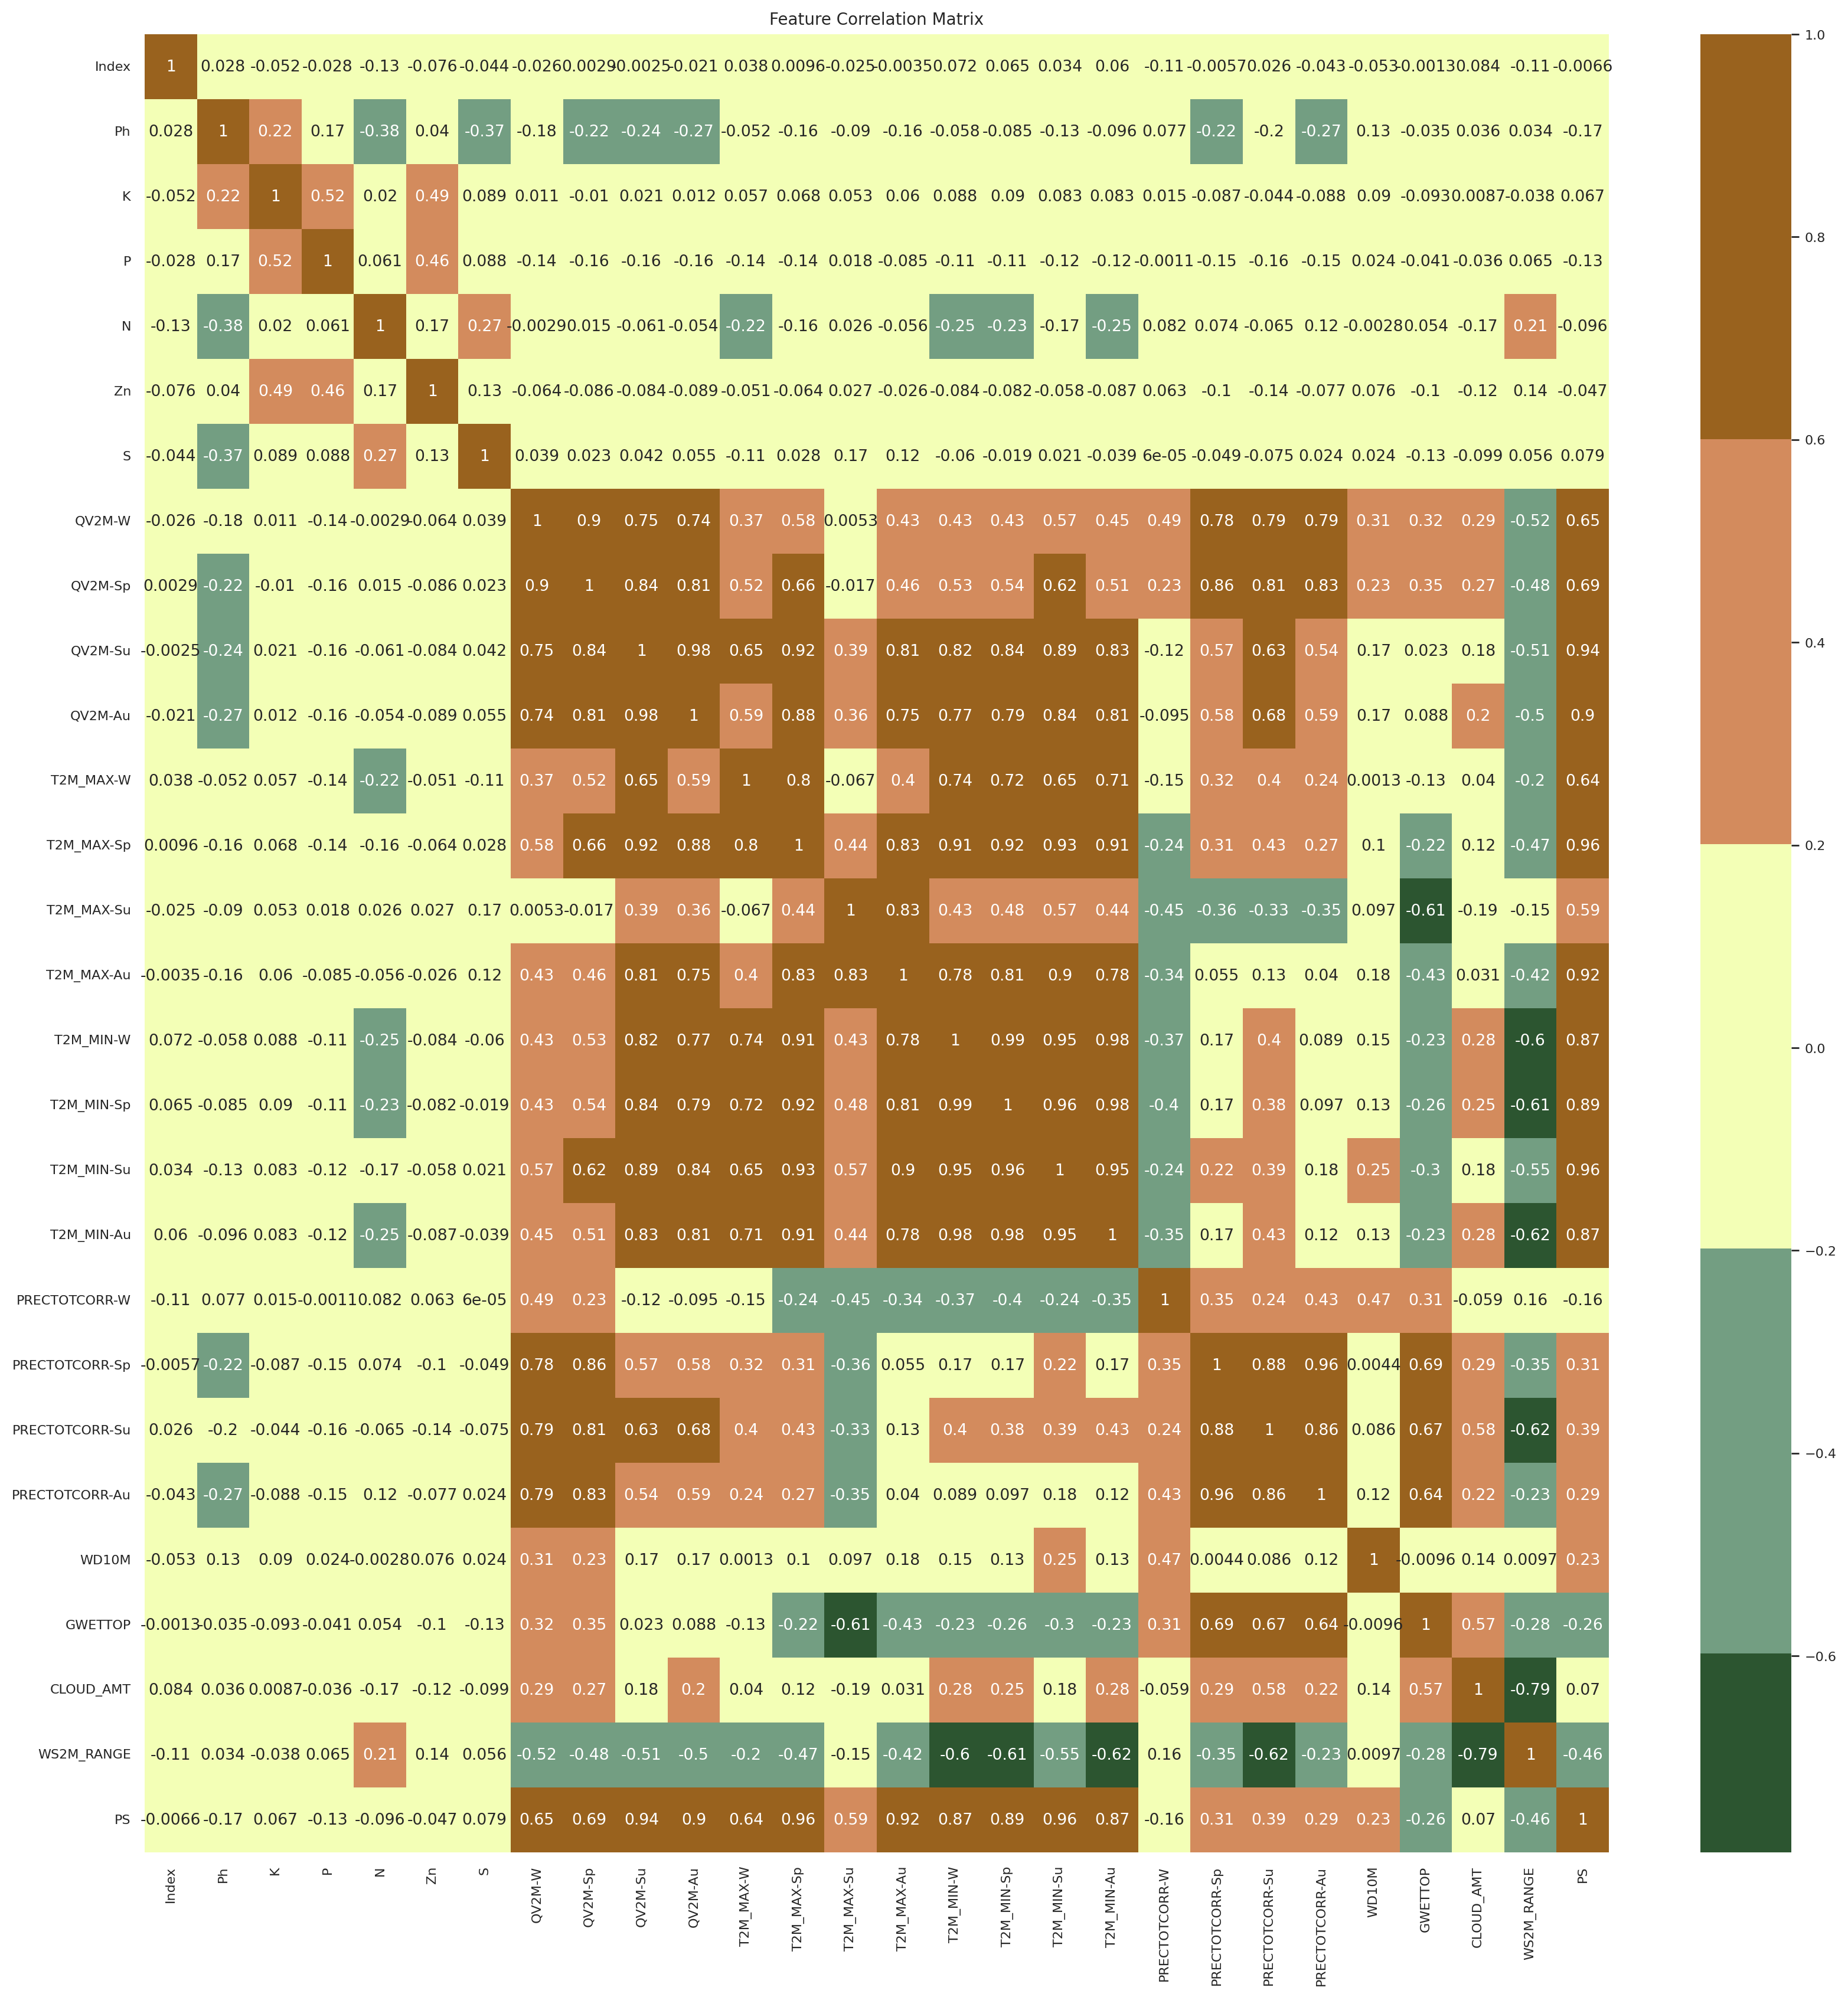

In [ ]:
# Create correlation matrix
correlation_matrix = data.drop(columns=['Soilcolor','label'], axis=1).corr()

# Visualize correlations
fig, axes = plt.subplots(figsize=(20,20), dpi=100)
sns.heatmap(correlation_matrix, annot=True, cmap=custom_palette, center=0)
plt.title('Feature Correlation Matrix')
# Adjust label sizes
plt.xticks(fontsize=8)  # Smaller x-axis labels
plt.yticks(fontsize=8)  # Smaller y-axis labels
plt.title('Feature Correlation Matrix', fontsize=10)  # Smaller title
plt.show()

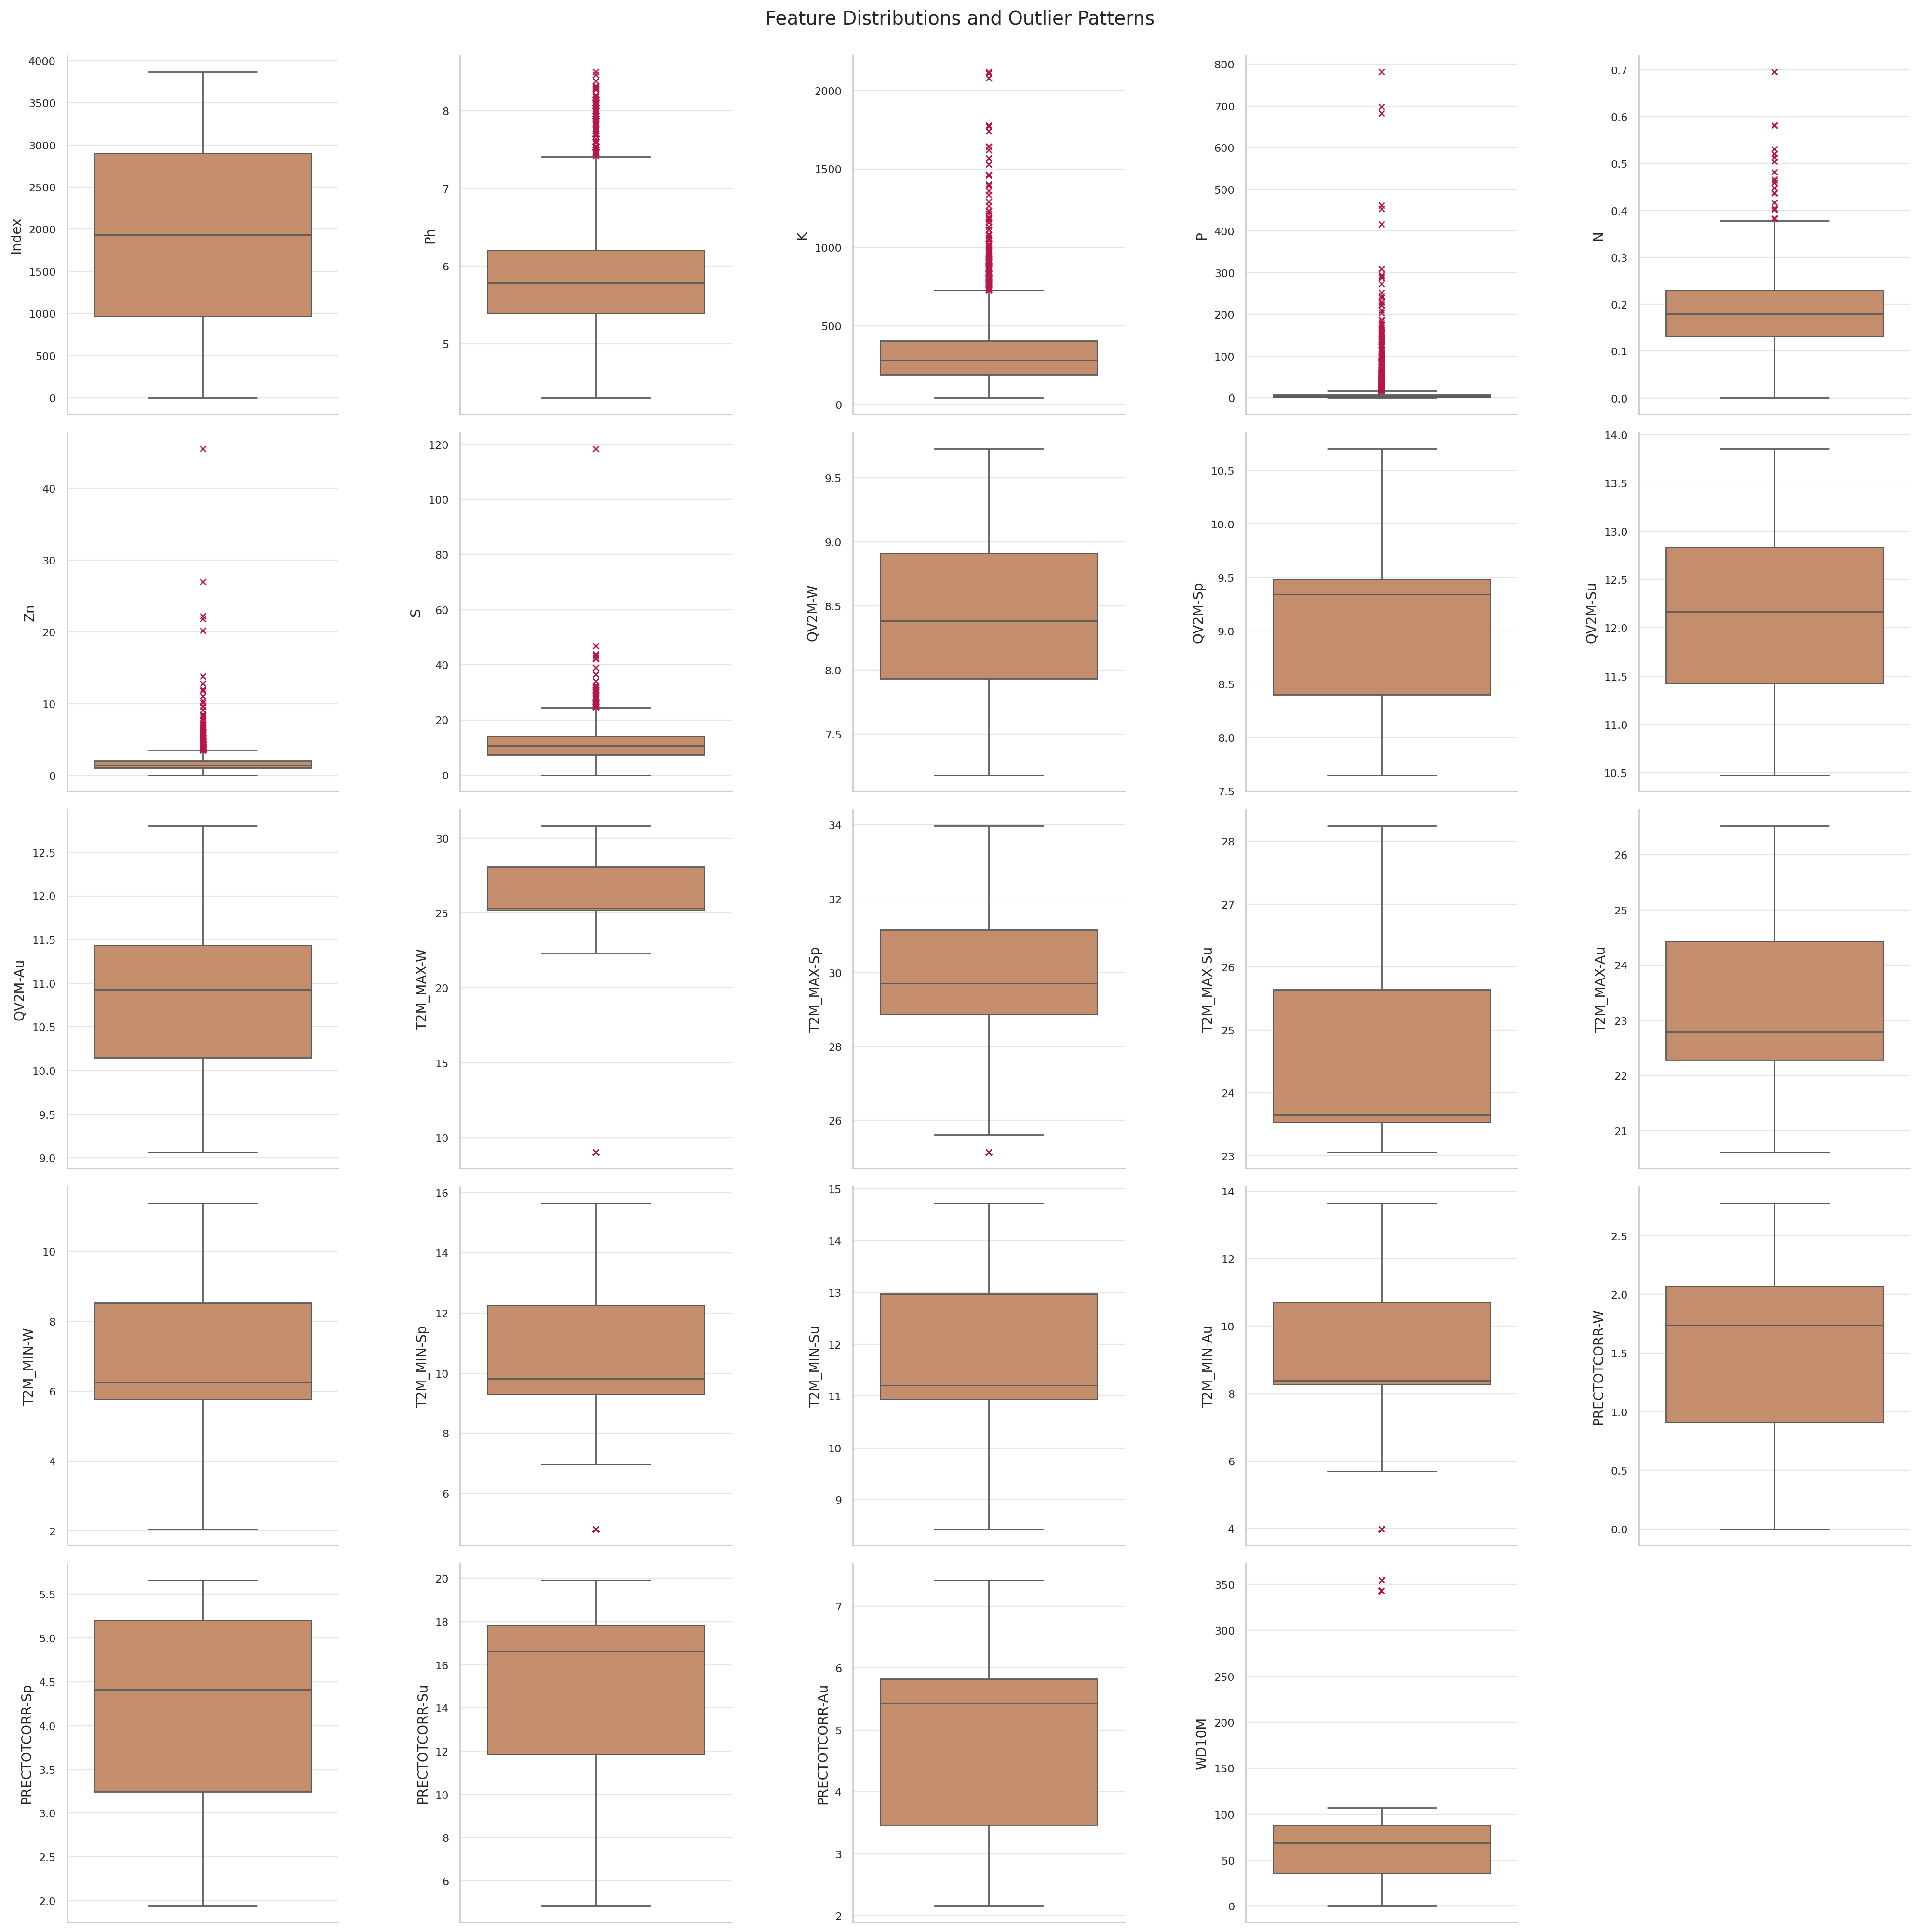

In [ ]:
# Visualize distributions
fig, axes = plt.subplots(5, 5, figsize=(20,20))

for ax, col in zip(axes.flat[:len(crops_features.columns)], crops_features.columns): # .flat converts a multi-dimensional array into a 1D array.
    # Create a boxplot
    sns.boxplot(data=crops_features, y=col, ax=ax, color=custom_palette[3], flierprops={'markerfacecolor': '#b6174b',
                                                                                       'markeredgecolor': '#b6174b',
                                                                                       'marker': 'x',
                                                                                       'markersize': 4})
axes.flat[-1].remove()
# Add figure title
fig.suptitle('Feature Distributions and Outlier Patterns', y=1)
plt.tight_layout(h_pad=1, w_pad=5)  # Increase spacing between subplots
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder_soil = LabelEncoder()
label_encoder_label = LabelEncoder()
data['Soilcolor'] = label_encoder_soil.fit_transform(data['Soilcolor'])
data['label'] = label_encoder_label.fit_transform(data['label'])

In [ ]:
X = data.drop(columns=['label'])
y = data['label']

In [ ]:
#value 0 or 1 ko bicha ma aauna (normalize gareko)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def evaluate_model(model, X_test, y_test):
    # Predicting using the provided model
    y_pred = model.predict(X_test)

    # Calculating accuracy
    score = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy on Test Data = {score*100:.2f}%")

    # Printing classification report
    print(f"Classification Report {model} :\n{classification_report(y_test, y_pred)}")

    # Calculating and printing confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix:\n{cf_matrix}")

    # Plotting the confusion matrix
    fig, ax = plt.subplots(figsize=(6,6))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm')
    fig.suptitle("Confusion Matrix", color="orange", fontsize=16)
    ax.set(xlabel="Predicted Label", ylabel="Actual Label")
    plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
#creating an object for randomforestclassifier
clf = RandomForestClassifier(random_state=42)
#run
clf.fit(X_train, y_train)
y_predrandom = clf.predict(X_test)

# Evaluating the model
score_RandomForestClassifier = accuracy_score(y_test, y_predrandom)
print(f"Model Accuracy on Test Data = {score_RandomForestClassifier*100:.2f}%")

Model Accuracy on Test Data = 93.41%


Model Accuracy on Test Data = 93.41%
Classification Report RandomForestClassifier(random_state=42) :
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       121
           1       0.79      0.83      0.81        41
           2       0.88      1.00      0.94        15
           3       0.00      0.00      0.00         3
           4       0.87      0.94      0.90       141
           5       0.75      0.60      0.67        15
           6       0.79      0.73      0.76        15
           7       0.40      0.33      0.36         6
           8       0.67      0.44      0.53         9
           9       0.56      0.36      0.43        14
          10       1.00      1.00      1.00       254
          11       1.00      1.00      1.00       140

    accuracy                           0.93       774
   macro avg       0.72      0.68      0.70       774
weighted avg       0.93      0.93      0.93       774

Confusion Matrix:
[[116   1   1 

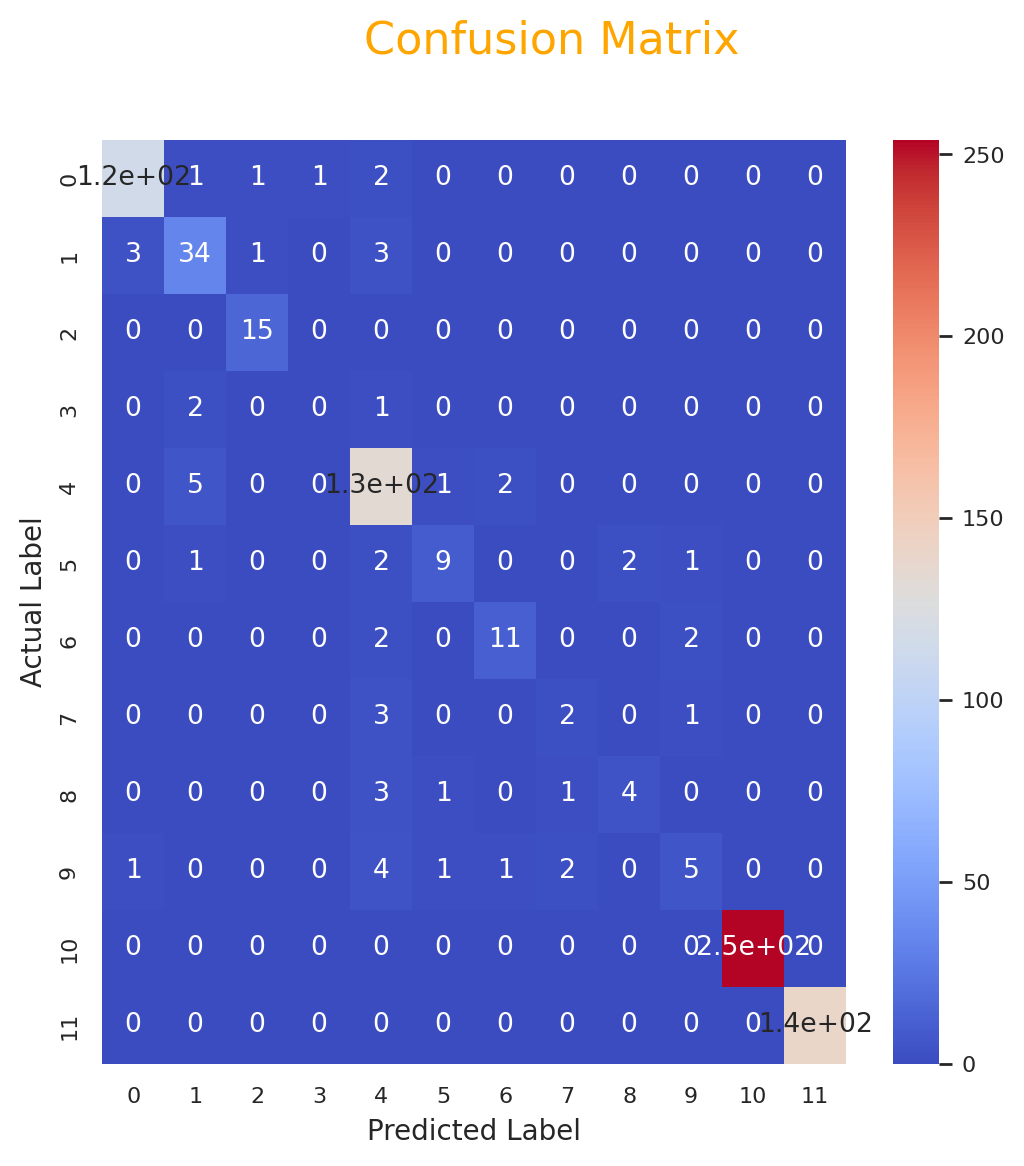

In [ ]:
evaluate_model(clf,X_test,y_test)

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_predxgb = xgb.predict(X_test)
score_XGBClassifier = accuracy_score(y_test, y_predxgb)
print(f"Model Accuracy on Test Data = {score_XGBClassifier*100:.2f}%")

Model Accuracy on Test Data = 99.35%


Model Accuracy on Test Data = 99.35%
Classification Report XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00        41
         

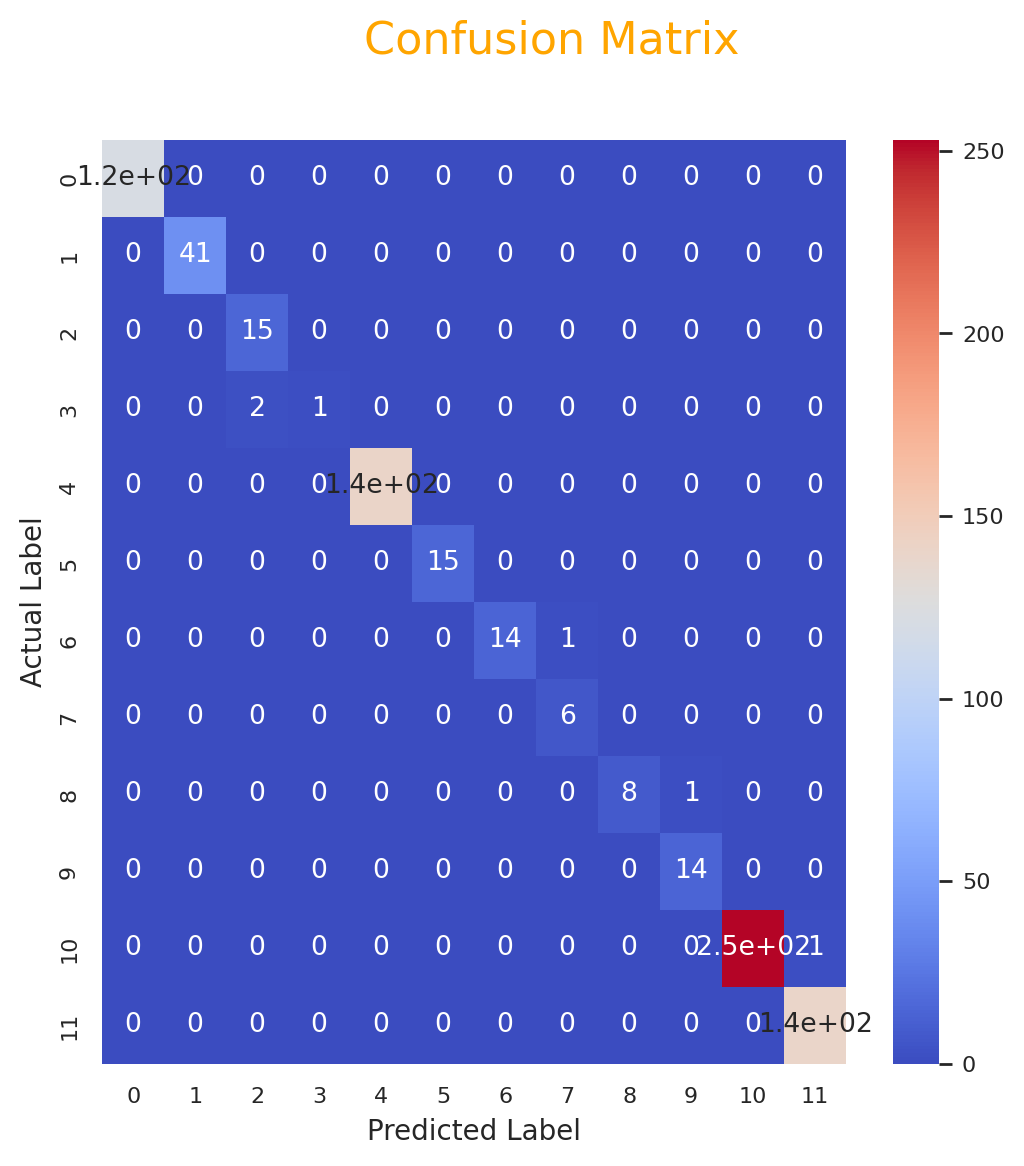

In [ ]:
evaluate_model(xgb,X_test,y_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
y_predKNN = KNN.predict(X_test)
score_KNeighborsClassifier = accuracy_score(y_test, y_predKNN)
print(f"Model Accuracy on Test Data = {score_KNeighborsClassifier*100:.2f}%")

Model Accuracy on Test Data = 77.52%


Model Accuracy on Test Data = 77.52%
Classification Report KNeighborsClassifier() :
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       121
           1       0.37      0.37      0.37        41
           2       0.67      0.40      0.50        15
           3       0.00      0.00      0.00         3
           4       0.69      0.84      0.76       141
           5       1.00      0.07      0.12        15
           6       0.56      0.33      0.42        15
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         9
           9       0.14      0.07      0.10        14
          10       0.84      0.96      0.90       254
          11       0.94      0.83      0.88       140

    accuracy                           0.78       774
   macro avg       0.50      0.39      0.40       774
weighted avg       0.76      0.78      0.76       774

Confusion Matrix:
[[ 94  12   2   0  10   0   0  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


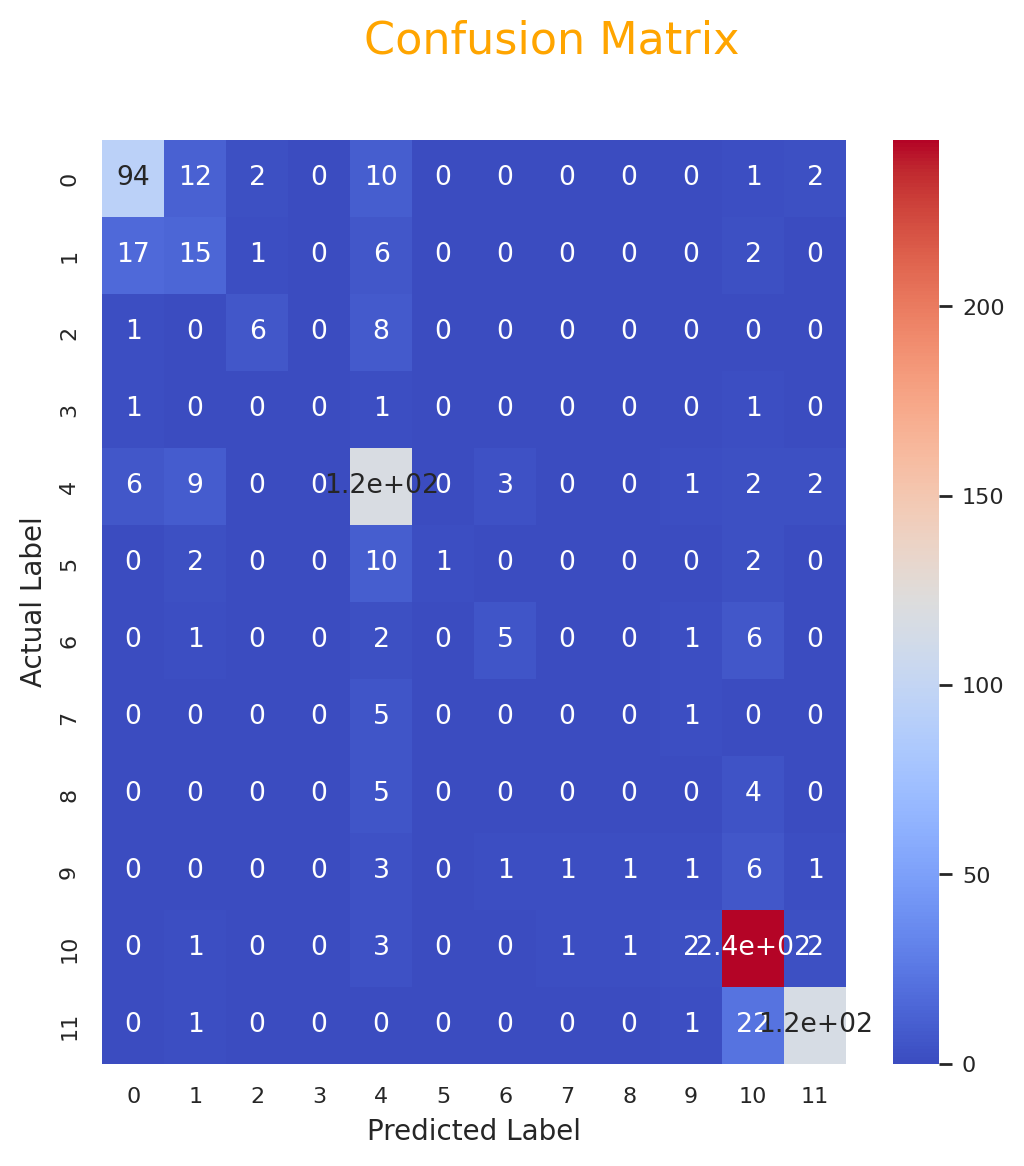

In [ ]:
evaluate_model(KNN,X_test,y_test)

<ipython-input-46-20176ab08926>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=data, palette='ocean')


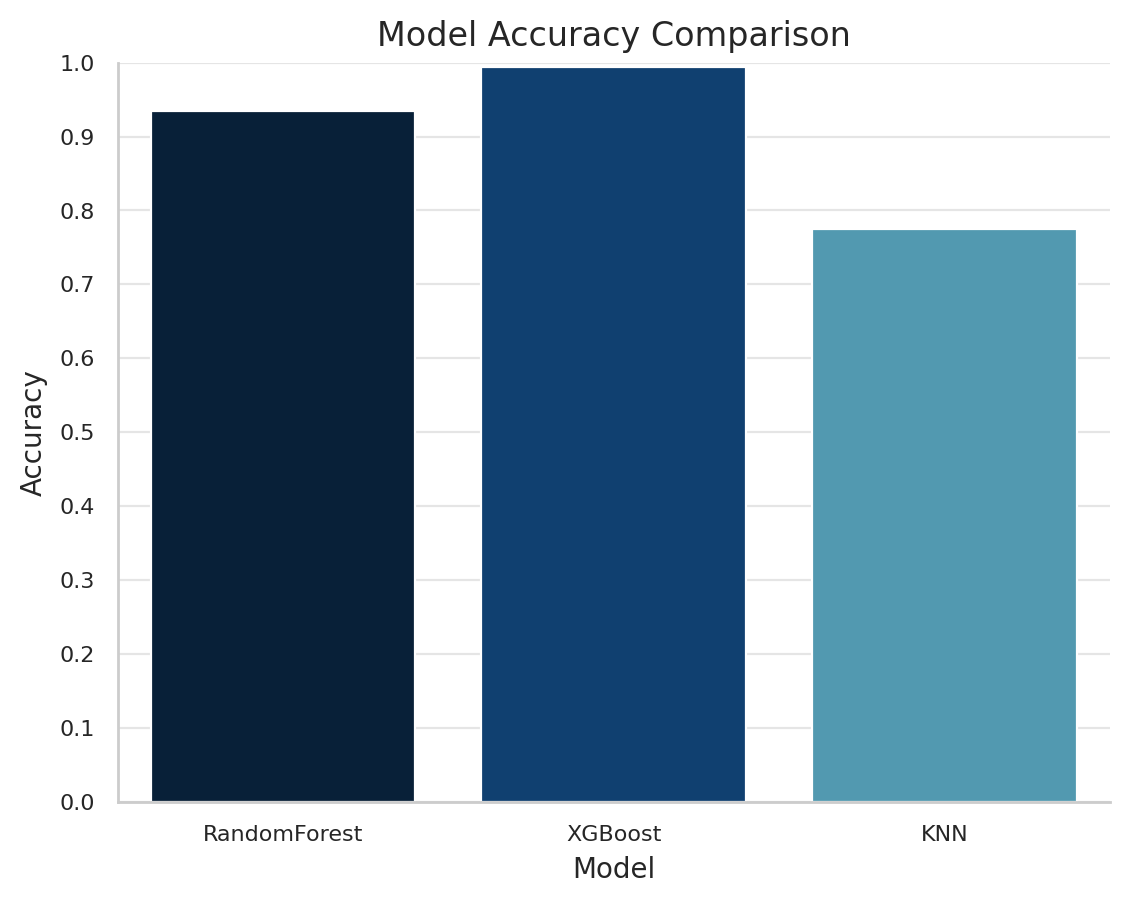

In [ ]:
#Data for plotting
models = ['RandomForest', 'XGBoost', 'KNN']
scores = [score_RandomForestClassifier, score_XGBClassifier, score_KNeighborsClassifier]

#Create a DataFrame for Seaborn
data = pd.DataFrame({'Model': models, 'Accuracy': scores})

#Plot
sns.barplot(x='Model', y='Accuracy', data=data, palette='ocean')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.yticks([i * 0.1 for i in range(11)])  # Set y-axis ticks at intervals of 0.1
plt.title('Model Accuracy Comparison')
plt.show()

In [ ]:
import joblib

# Save the trained Random Forest model
joblib.dump(xgb, 'gradient_boosting.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Save the label encoder for the target variable
joblib.dump(label_encoder_label, 'label_encoder.pkl')

print("Model, scaler, and label encoder saved successfully!")
# Save the label encoder for 'Soilcolor'
joblib.dump(label_encoder_soil, 'soilcolor_encoder.pkl')
print("Soilcolor encoder saved successfully!")

Model, scaler, and label encoder saved successfully!
Soilcolor encoder saved successfully!


In [ ]:
# Load saved files
loaded_model = joblib.load('/content/gradient_boosting.pkl')
loaded_scaler = joblib.load('/content/scaler.pkl')
loaded_label_encoder_label = joblib.load('/content/label_encoder.pkl')
loaded_label_encoder_soil = joblib.load('/content/soilcolor_encoder.pkl')

# Example: New data for inference (ensure all feature columns are included)
new_data = {
    'Index': [0],  # Dummy ID (not used for prediction, but included if required)
    'Soilcolor': ['red'],  # Categorical column
    'Ph': [6.5],  # Numerical column
    'Potassium': [120],  # Numerical column
    'Phosphorus': [30],  # Numerical column
    'Nitrogen': [60],  # Numerical column
    'Zinc': [1.5],  # Numerical column
    'Sulphur': [12],  # Numerical column
    'Humidity-W': [0.75],  # Numerical column
    'Humidity-Sp': [0.65],  # Numerical column
    'Humidity-Su': [0.55],  # Numerical column
    'Humidity-Au': [0.45],  # Numerical column
    'Air_Temperature_MAX-W': [25],  # Numerical column
    'Air_Temperature_MAX-Sp': [22],  # Numerical column
    'Air_Temperature_MAX-Su': [30],  # Numerical column
    'Air_Temperature_MAX-Au': [20],  # Numerical column
    'Air_Temperature_MIN-W': [10],  # Numerical column
    'Air_Temperature_MIN-Sp': [8],  # Numerical column
    'Air_Temperature_MIN-Su': [15],  # Numerical column
    'Air_Temperature_MIN-Au': [5],  # Numerical column
    'Precipitation-W': [100],  # Numerical column
    'Precipitation-Sp': [80],  # Numerical column
    'Precipitation-Su': [60],  # Numerical column
    'Precipitation-Au': [90],  # Numerical column
    'Wind_Direction_10m_above_ground': [270],  # Numerical column
    'Soil_Moisture_in_top_layer': [0.3],  # Numerical column
    'Cloud_cover_percentage_or_amount': [0.5],  # Numerical column
    'Range_of_wind_speed_at_2m_above_ground': [5],  # Numerical column
    'Atmospheric_pressure': [1013],  # Numerical column
}

# Convert new data to a DataFrame
new_data_df = pd.DataFrame(new_data)

# Encode the 'Soilcolor' column using the saved encoder
new_data_df['Soilcolor'] = loaded_label_encoder_soil.transform(new_data_df['Soilcolor'])


# Get the feature names used during training
training_feature_names = loaded_scaler.feature_names_in_

# Ensure the new data DataFrame has the same columns (and in the same order) as the training data
new_data_df = new_data_df.reindex(columns=training_feature_names, fill_value=0) #fill_value is used to fill any missing columns with a default value


# Scale the features using the saved scaler
new_data_scaled = loaded_scaler.transform(new_data_df)

# Predict the crop label using the saved model
predicted_label_encoded = loaded_model.predict(new_data_scaled)

# Decode the predicted label to a human-readable form
predicted_label = loaded_label_encoder_label.inverse_transform(predicted_label_encoded)

print("Predicted Crop:", predicted_label[0])

Predicted Crop: Barley
